# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy.random as random
from scipy import stats

%matplotlib inline

def precision(variable, digits):
    return np.float('{variable:.{precision}f}'.format(variable=variable, precision=digits))


def get_p(t, dof, tails=2):

    """
    return p-value
    tails = 0: left tail
    tails = 1: right tail
    tails = 2: two-sided [Default]
    """
       
    if tails == 0: #left tail
        p = stats.t.cdf(t, dof)
    elif tails == 1: #right tail
        p = 1 - stats.t.cdf(t, dof)
    else: #two-sided
        p = 2*(1-stats.t.cdf(abs(t), dof))
                
    return p


def t_test(sample, mu, tails=2):
    
    """
    one sample t-test
    tails = 0: left tail
    tails = 1: right tail
    tails = 2: two-sided [Default]
    mu = H_0: null hypothesis
    """
    
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=1) # (N_samples - ddof) i.e. (N - 1)
    #sample_sem = np.sqrt((sample_var / len(sample)))
    sample_sem = stats.sem(sample)
    t = (sample_mean - mu)/sample_sem
    
    dof = len(sample) - 1
    """
    if tails == 0: #left tail
        p = stats.t.cdf(t, dof)
    elif tails == 1: #right tail
        p = 1 - stats.t.cdf(t, dof)
    else: #two-sided
        p = 2*(1-stats.t.cdf(abs(t), dof))
    """
    p = get_p(t, dof, tails)
    
    return (t, p)


def t_test_2sample(sample1, sample2, tails=2, paired=0):
    
    """
    two sample t-test
    tails = 0: left tail
    tails = 1: right tail
    tails = 2: two-sided [Default]
    
    paired = 0: independent [Default]
    paired = 1
    """
    if paired:
        diff = np.subtract(sample1, sample2)
        (t, p) = t_test(diff, 0, tails)
    else:
        n1 = len(sample1)
        n2 = len(sample2)
        sample_mean1 = np.mean(sample1)
        sample_mean2 = np.mean(sample2)
        sample_var1 = np.var(sample1, ddof=1) # (N_samples - ddof) i.e. (N - 1)
        sample_var2 = np.var(sample2, ddof=1)
        #sample_sem = np.sqrt((sample_var / len(sample)))
        sample_sem = np.sqrt((sample_var1 / n1) + (sample_var2 / n2))
        t = (sample_mean1 - sample_mean2)/sample_sem
    
        dof = (n1 - 1) + (n2 - 1)
        p = get_p(t, dof, tails)
             
    return (t, p)


def mean_confidence_interval_t(sample, confidence=0.95):
    n = len(sample)
    sample_mean = np.mean(sample)
    #sample_var = np.var(sample, ddof=1) # (N_samples - ddof) i.e. (N - 1)
    #sample_sem = (sample_var / len(sample)) ** 0.5
    sample_sem = stats.sem(sample)
    delta = sample_sem * stats.t.ppf((1+confidence)/2., n-1)
    return sample_mean, sample_sem, sample_mean - delta, sample_mean + delta


def mean_confidence_interval_norm(sample, confidence=0.95):
    n = len(sample)
    sample_mean = np.mean(sample)
    #sample_var = np.var(sample, ddof=1) # (N_samples - ddof) i.e. (N - 1)
    #sample_sem = (sample_var / len(sample)) ** 0.5
    sample_sem = stats.sem(sample)
    delta = sample_sem * stats.norm.ppf((1+confidence)/2.)
    return sample_mean, sample_sem, sample_mean - delta, sample_mean + delta
    

df = pd.read_csv('data/human_body_temperature.csv')

H_0 = 98.6

In [2]:
all_stats = df.describe(include='all')
#print('{}'.format(all_stats))
all_stats #JUPYTER output

,temperature,gender,heart_rate
count,130.000000,130,130.000000
unique,NaN,2,NaN
top,NaN,M,NaN
freq,NaN,65,NaN
mean,98.249231,NaN,73.761538
std,0.733183,NaN,7.062077
min,96.300000,NaN,57.000000
25%,97.800000,NaN,69.000000
50%,98.300000,NaN,74.000000
75%,98.700000,NaN,79.000000


In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
MF_bins = np.int(np.ceil(len(df.temperature)/10))
MF_temp = df.temperature.sort_values().reset_index(drop=True)
F_temp = df.temperature[df.gender=='F'].sort_values().reset_index(drop=True)
M_temp = df.temperature[df.gender=='M'].sort_values().reset_index(drop=True)

In [5]:
MF_stats = MF_temp.describe()
#print('{}'.format(MF_stats))
MF_stats #JUPYTER output

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [6]:
F_stats = F_temp.describe()
#print('{}'.format(F_stats))
F_stats #JUPYTER output

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [7]:
M_stats = M_temp.describe()
#print('{}'.format(M_stats))
M_stats #JUPYTER output

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

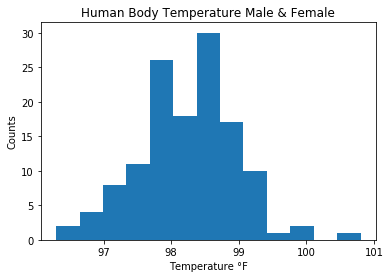

In [8]:
_ = plt.hist(MF_temp, bins=MF_bins, normed=False)

_ = plt.xlabel('Temperature \u00B0F')
_ = plt.ylabel('Counts')
_ = plt.title('Human Body Temperature Male & Female')

plt.show()

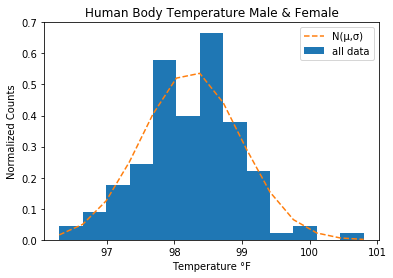

In [9]:
dft, t_bins, nrm = plt.hist(MF_temp, bins=MF_bins, normed=True)

t_norm = mlab.normpdf(t_bins, MF_stats['mean'], MF_stats['std'])

plt.plot(t_bins, t_norm, '--')

_ = plt.xlabel('Temperature \u00B0F')
_ = plt.ylabel('Normalized Counts')
_ = plt.title('Human Body Temperature Male & Female')
_ = plt.legend(['N(\u03BC,\u03C3)', 'all data'])

plt.show()

In [10]:
F_bins = np.int(np.ceil(len(F_temp)/10))
M_bins = np.int(np.ceil(len(M_temp)/10))

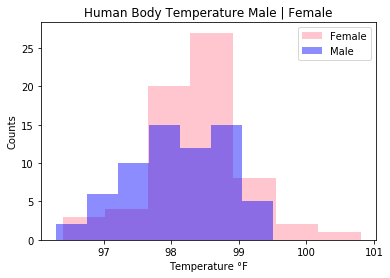

In [11]:
_ = plt.hist(F_temp, bins=F_bins, normed=False, color='pink', alpha=0.9)

_ = plt.hist(M_temp, bins=M_bins, normed=False, color='blue', alpha=0.45)

_ = plt.xlabel('Temperature \u00B0F')
_ = plt.ylabel('Counts')
_ = plt.title('Human Body Temperature Male | Female')
_ = plt.legend(['Female', 'Male'])

plt.show()

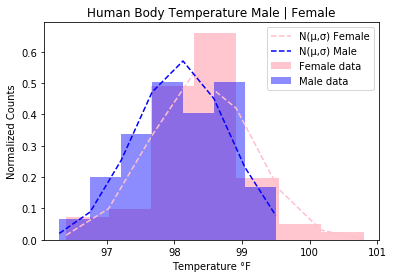

In [12]:
dft, tF_bins, nrm = plt.hist(F_temp, bins=F_bins, normed=True, color='pink', alpha=0.9)

tF_norm = mlab.normpdf(tF_bins, F_stats['mean'] , F_stats['std'])

plt.plot(tF_bins, tF_norm, '--', color='pink')

dft, tM_bins, nrm = plt.hist(M_temp, bins=M_bins, normed=True, color='blue', alpha=0.45)

tM_norm = mlab.normpdf(tM_bins, M_stats['mean'] , M_stats['std'])

plt.plot(tM_bins, tM_norm, '--', color='blue')

_ = plt.xlabel('Temperature \u00B0F')
_ = plt.ylabel('Normalized Counts')
_ = plt.title('Human Body Temperature Male | Female')
_ = plt.legend(['N(\u03BC,\u03C3) Female', 'N(\u03BC,\u03C3) Male', 'Female data', 'Male data'])

plt.show()

In [42]:
np.random.seed(17)
#norm = np.sort(random.normal(MF_stats['mean'], MF_stats['std'], len(MF_temp)))
norm = np.sort(random.normal(0, 1, len(MF_temp)))

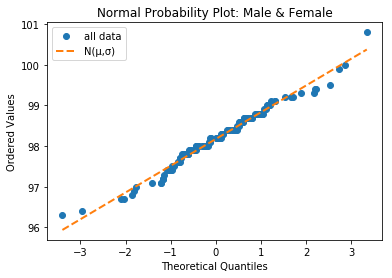

In [47]:
_ = plt.plot(norm, MF_temp, 'o')

z = np.polyfit(norm, MF_temp, 1)
p = np.poly1d(z)

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Normal Probability Plot: Male & Female')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Ordered Values')
_ = plt.legend(['all data', 'N(\u03BC,\u03C3)'])

plt.show()

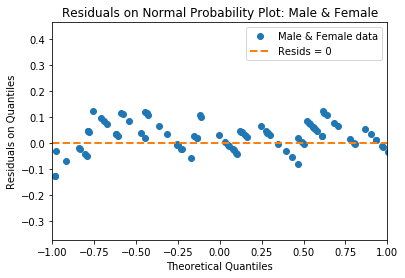

In [48]:

resid = MF_temp - p(norm)
_ = plt.plot(norm, resid, 'o')
#z = np.polyfit(norm, MF_temp, 1)
p = np.poly1d([0, 0])

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Residuals on Normal Probability Plot: Male & Female')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Residuals on Quantiles')
_ = plt.xlim(-1,1)
_ = plt.legend(['Male & Female data', 'Resids = 0'])

plt.show()


In [52]:
#norm = np.sort(random.normal(F_stats['mean'], F_stats['std'], len(F_temp)))
norm = np.sort(random.normal(0, 1, len(F_temp)))

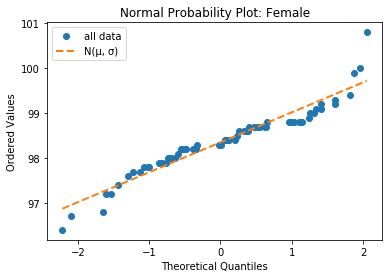

In [53]:
_ = plt.plot(norm, F_temp, 'o')

z = np.polyfit(norm, F_temp, 1)
p = np.poly1d(z)

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Normal Probability Plot: Female')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Ordered Values')
_ = plt.legend(['all data', 'N(\u03BC, \u03C3)'])

plt.show()

In [54]:
#norm = np.sort(random.normal(F_stats['mean'], F_stats['std'], len(F_temp)))
norm = np.sort(random.normal(0, 1, len(F_temp)))

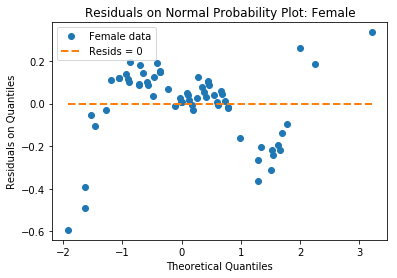

In [63]:
z = np.polyfit(norm, F_temp, 1)
p = np.poly1d(z)
resid = F_temp - p(norm)
_ = plt.plot(norm, resid, 'o')
#z = np.polyfit(norm, F_temp, 1)
p = np.poly1d([0, 0])

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Residuals on Normal Probability Plot: Female')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Residuals on Quantiles')
_ = plt.legend(['Female data', 'Resids = 0'])

#_ = plt.xlim(-1, 1)
plt.show()

In [57]:
#norm = np.sort(random.normal(M_stats['mean'], M_stats['std'], len(M_temp)))
norm = np.sort(random.normal(0, 1, len(M_temp)))

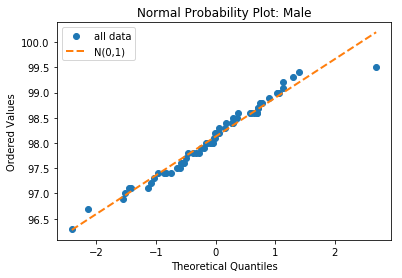

In [59]:
_ = plt.plot(norm, M_temp, 'o')

z = np.polyfit(norm, M_temp, 1)
p = np.poly1d(z)

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Normal Probability Plot: Male')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Ordered Values')
_ = plt.legend(['all data', 'N(0,1)'])

plt.show()

In [60]:
#norm = np.sort(random.normal(M_stats['mean'], M_stats['std'], len(M_temp)))
norm = np.sort(random.normal(0, 1, len(M_temp)))

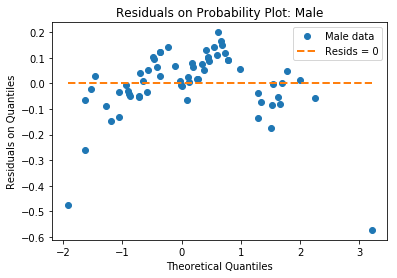

In [62]:
z = np.polyfit(norm, M_temp, 1)
p = np.poly1d(z)

resid = M_temp - p(norm)
_ = plt.plot(norm, resid, 'o')
#z = np.polyfit(norm, M_temp, 1)
p = np.poly1d([0, 0])

_ = plt.plot(norm, p(norm), '--', linewidth=2)

_ = plt.title('Residuals on Probability Plot: Male')
_ = plt.xlabel('Theoretical Quantiles')
_ = plt.ylabel('Residuals on Quantiles')
_ = plt.legend(['Male data', 'Resids = 0'])

#_ = plt.xlim(-1, 1)
plt.show()

In [24]:
stats.t.ppf(1-0.975, 129)

-1.9785244914586051

In [25]:
t_test(MF_temp, H_0, tails=0)

(-5.4548232923642983, 1.2053160207792869e-07)

In [26]:
stats.t.cdf(1.98, 129)

0.9750840437071584

In [27]:
stats.t.interval(0.95, len(MF_temp)-1, loc=np.mean(MF_temp), scale=stats.sem(MF_temp))
mean_confidence_interval_t(MF_temp, confidence=0.95)

(98.24923076923076,
 0.064304416837891024,
 98.122002905608028,
 98.376458632853499)

In [28]:
mean_confidence_interval_t(MF_temp, confidence=0.99)

(98.24923076923076,
 0.064304416837891024,
 98.081108242397576,
 98.417353296063951)

In [29]:
mean_confidence_interval_t(MF_temp, confidence=0.999)

(98.24923076923076,
 0.064304416837891024,
 98.032682658320084,
 98.465778880141443)

In [30]:
precision(all_stats['temperature']['mean'], 2)

98.25

In [31]:
precision(F_stats['mean'], 2)

98.39

In [32]:
precision(M_stats['mean'], 2)

98.1

In [33]:
t_test_2sample(F_temp, M_temp, tails=2, paired=0)

(2.2854345381654992, 0.023931883122402242)

In [34]:
stats.norm.interval(0.95, loc=np.mean(MF_temp), scale=stats.sem(MF_temp))
mean_confidence_interval_norm(MF_temp, confidence=0.95)

(98.24923076923076,
 0.064304416837891024,
 98.123196428181643,
 98.375265110279884)

In [35]:
stats.norm.interval(0.99, loc=np.mean(MF_temp), scale=stats.sem(MF_temp))
mean_confidence_interval_norm(MF_temp, confidence=0.99)

(98.24923076923076,
 0.064304416837891024,
 98.083593567992096,
 98.41486797046943)

In [36]:
stats.norm.interval(0.999, loc=np.mean(MF_temp), scale=stats.sem(MF_temp))
mean_confidence_interval_norm(MF_temp, confidence=0.999)

(98.24923076923076,
 0.064304416837891024,
 98.037635366672689,
 98.460826171788838)

In [37]:
MF_temp_10 = np.random.choice(MF_temp, replace=True, size=10)
#MF_temp_10
#stats.t.interval(0.95, len(MF_temp_10)-1, loc=np.mean(MF_temp_10), scale=stats.sem(MF_temp_10))
mean_confidence_interval_t(MF_temp_10, confidence=0.95)

(98.219999999999999,
 0.2021000852163215,
 97.762817844637325,
 98.677182155362672)

In [38]:
#stats.norm.interval(0.95, len(MF_temp_10), loc=np.mean(MF_temp_10), scale=stats.sem(MF_temp_10))
mean_confidence_interval_norm(MF_temp_10, confidence=0.95)

(98.219999999999999,
 0.2021000852163215,
 97.823891111703531,
 98.616108888296466)

In [39]:
t_test(MF_temp_10, H_0, tails=0)

(-1.8802565055489984, 0.046384162305324467)

In [40]:
stats.t.cdf(-0.087, 9)

0.46628821031402279

In [41]:
stats.norm.cdf(-0.087)

0.46533575605428545